In [1]:
#I wanted to share this dataset as an opportunity to practice 1) the NLP skillset covered in PluralSight and 2) EDA for the Data Science Assessment. 

#The ask with this dataset is to present a statistical analysis of the attached data. Using whatever tools you consider appropriate, please answer the question, "What factors make a Young Adult author more likely to be successful?" Assume that success means a rating of 4.5 or above and a reviewer count of 100 or above. 

#If you choose to participate in this optional assignment, please spend a few hours and create a notebook to share by 11/20. We can then review together and share our technique + findings. My hope is that this assignment can help flesh out/standardize what we might do in a DS Assessment + provide NLP practice.


In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [3]:
data = pd.read_csv("2016_YA_books.csv")
data.head()
data.shape
data.head(5)

,Book title,Author name,Star rating,Number of reviews,Length,Publisher
0,Mistrust,Margaret McHeyzer,4.5,64,333,Amazon
1,Girl in Pieces,Kathleen Glasgow,4.5,139,418,Delacorte
2,Just Juliet,Charlotte Reagan,4.5,369,224,Inkitt
3,Dork in Love ~ Tales of My Dorky Love Life: Te...,Ann Writes,4.5,9,122,Amazon
4,Warrior Cats: Battle (Warrior Cats (Werecat YA...,Tiyana Angel,5.0,1,52,Guardian Angel Press


In [4]:
data = data.rename(columns = {"Book title":"title", "Author name":"author", "Star rating":"rating", "Number of reviews":"n_reviews", "Length":"length", "Publisher":"pub"})
data.describe()

,rating,n_reviews,length
count,100.000000,100.00000,100.000000
mean,4.315000,164.55000,327.440000
std,0.399842,261.62601,116.095861
min,3.000000,1.00000,52.000000
25%,4.000000,28.00000,242.000000
50%,4.500000,74.50000,323.000000
75%,4.500000,179.00000,400.000000
max,5.000000,1591.00000,793.000000


In [5]:
#return unique value counts for each col

for col in data.columns:
    uni = np.unique(data[col])
    print(col, np.prod(uni.shape))

title 100
author 96
rating 5
n_reviews 82
length 79
pub 56


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AA81E44888>,
      dtype=object)

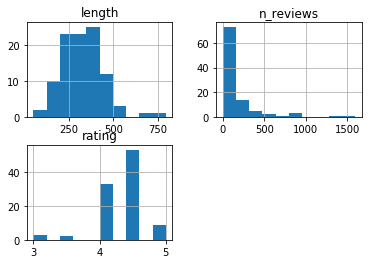

In [6]:
pd.DataFrame(data, columns = ['rating', 'n_reviews', 'length']).hist()

In [7]:
#create target variable 'success'
data['success'] = np.where((data['rating'] > 4) & (data['n_reviews']), 1, 0)
data.head(10)

,title,author,rating,n_reviews,length,pub,success
0,Mistrust,Margaret McHeyzer,4.5,64,333,Amazon,0
1,Girl in Pieces,Kathleen Glasgow,4.5,139,418,Delacorte,1
2,Just Juliet,Charlotte Reagan,4.5,369,224,Inkitt,1
3,Dork in Love ~ Tales of My Dorky Love Life: Te...,Ann Writes,4.5,9,122,Amazon,1
4,Warrior Cats: Battle (Warrior Cats (Werecat YA...,Tiyana Angel,5.0,1,52,Guardian Angel Press,1
5,Out of Beat (Boys of Fallout Book 1),Cassandra Giovanni,4.5,11,231,Show not Tell Publishing,1
6,A Different Truth,Annette Oppenlander,4.5,25,256,Amazon,1
7,Tell Me Three Things,Julie Buxbaum,4.5,218,338,Delacorte,0
8,The Fever Code: Book Five,James Dashner,4.5,235,384,Delacorte,1
9,The Passion of Dolssa,Julie Berry,4.5,57,496,Viking Books for Young Readers,1


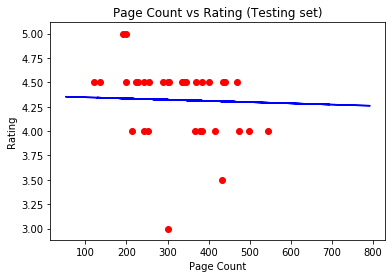

In [8]:
# simple linear model w 2 variables
import matplotlib.pyplot as plt

#split
data_num = data[['length', 'rating']]
X = data_num.iloc[:,:-1].values  #independent variable array
y = data_num.iloc[:,1].values  #dependent variable vector

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3,random_state=0)

#fit model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train) #actually produces the linear eqn for the data

#predict
y_pred = regressor.predict(X_test) 
y_pred



#plot for the TEST
 
plt.scatter(X_test, y_test, color='red') 
plt.plot(X_train, regressor.predict(X_train), color='blue') # plotting the regression line
 
plt.title("Page Count vs Rating (Testing set)")
 
plt.xlabel("Page Count") 
plt.ylabel("Rating") 
plt.show() 

In [9]:

'''
# next steps:
1. split author names into M/F?
2. Encode publisher (prob important, if they sell on AMZN)
3. cluster book names? "Trilogy" might indicate success, but maybe not cause it?
4. Sentiment analysis
'''


'\n# next steps:\n1. split author names into M/F?\n2. Encode publisher (prob important, if they sell on AMZN)\n3. cluster book names? "Trilogy" might indicate success, but maybe not cause it?\n'

In [15]:
# notebook 1

import nltk
#nltk.download('stopwords')

text = "Dork in Love ~ Tales of My Dorky Love Life: The End"
from nltk.tokenize import word_tokenize, sent_tokenize
sents=sent_tokenize(text)
print(sents)

['Dork in Love ~ Tales of My Dorky Love Life: The End']


In [16]:
words=[word_tokenize(sent) for sent in sents]
print(words)

[['Dork', 'in', 'Love', '~', 'Tales', 'of', 'My', 'Dorky', 'Love', 'Life', ':', 'The', 'End']]


In [17]:
from nltk.corpus import stopwords 
from string import punctuation
customStopWords=set(stopwords.words('english')+list(punctuation))

In [18]:
wordsWOStopwords=[word for word in word_tokenize(text) if word not in customStopWords]
print(wordsWOStopwords)

['Dork', 'Love', 'Tales', 'My', 'Dorky', 'Love', 'Life', 'The', 'End']


In [19]:
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(wordsWOStopwords)
sorted(finder.ngram_fd.items())

[(('Dork', 'Love'), 1),
 (('Dorky', 'Love'), 1),
 (('Life', 'The'), 1),
 (('Love', 'Life'), 1),
 (('Love', 'Tales'), 1),
 (('My', 'Dorky'), 1),
 (('Tales', 'My'), 1),
 (('The', 'End'), 1)]

In [20]:
text2 = "Mary closed on closing night when she was in the mood to close."
from nltk.stem.lancaster import LancasterStemmer
st=LancasterStemmer()
stemmedWords=[st.stem(word) for word in word_tokenize(text2)]
print(stemmedWords)

['mary', 'clos', 'on', 'clos', 'night', 'when', 'she', 'was', 'in', 'the', 'mood', 'to', 'clos', '.']


In [23]:
nltk.pos_tag(word_tokenize(text2))

[('Mary', 'NNP'),
 ('closed', 'VBD'),
 ('on', 'IN'),
 ('closing', 'NN'),
 ('night', 'NN'),
 ('when', 'WRB'),
 ('she', 'PRP'),
 ('was', 'VBD'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('mood', 'NN'),
 ('to', 'TO'),
 ('close', 'VB'),
 ('.', '.')]

In [27]:
from nltk.corpus import wordnet as wn
for ss in wn.synsets('bass'):
    print(ss, ss.definition())

Synset('bass.n.01') the lowest part of the musical range
Synset('bass.n.02') the lowest part in polyphonic music
Synset('bass.n.03') an adult male singer with the lowest voice
Synset('sea_bass.n.01') the lean flesh of a saltwater fish of the family Serranidae
Synset('freshwater_bass.n.01') any of various North American freshwater fish with lean flesh (especially of the genus Micropterus)
Synset('bass.n.06') the lowest adult male singing voice
Synset('bass.n.07') the member with the lowest range of a family of musical instruments
Synset('bass.n.08') nontechnical name for any of numerous edible marine and freshwater spiny-finned fishes
Synset('bass.s.01') having or denoting a low vocal or instrumental range


In [28]:
from nltk.wsd import lesk
sense1 = lesk(word_tokenize("Sing in a lower tone, along with the bass"),'bass')
print(sense1, sense1.definition())

Synset('bass.n.07') the member with the lowest range of a family of musical instruments


In [50]:
sense2 = lesk(word_tokenize("This sea bass was really hard to catch"),'bass')
print(sense2, sense2.definition())

Synset('sea_bass.n.01') the lean flesh of a saltwater fish of the family Serranidae


In [51]:
# notebook 2
import urllib.request as urllib2
from bs4 import BeautifulSoup

In [52]:
articleURL = "https://www.washingtonpost.com/news/the-switch/wp/2016/10/18/the-pentagons-massive-new-telescope-is-designed-to-track-space-junk-and-watch-out-for-killer-asteroids/"

In [53]:
page = urllib2.urlopen(articleURL).read().decode('utf8','ignore') 
soup = BeautifulSoup(page,"lxml")
soup

<!DOCTYPE html>
<html lang="en"><head><title>The Pentagon’s massive new telescope is designed to track space junk and watch out for killer asteroids - The Washington Post</title><meta content="The Space Surveillance Telescope will help the Air Force track bits of debris as small as a softball." name="description"/><meta content="Washington Post" property="og:site_name"/><meta content="article" property="og:type"/><meta content="https://www.washingtonpost.com/news/the-switch/wp/2016/10/18/the-pentagons-massive-new-telescope-is-designed-to-track-space-junk-and-watch-out-for-killer-asteroids/" property="og:url"/><meta content="https://www.washingtonpost.com/wp-apps/imrs.php?src=https://arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/646GLHPE5Y5P3NCASHGL2LQSMY.jpg&amp;w=1440" property="og:image"/><meta content="The Pentagon’s massive new telescope is designed to track space junk and watch out for killer asteroids" property="og:title"/><meta content="The Space Surveillance Tel

In [54]:
soup.find('article')

<article class="grid-item grid-item--cols-sm-12 grid-item--cols-md-12 b-l br-l mb-xxl-ns mt-xxs mt-md-l grid-item--cols-lg-8 pr-lg-lg" data-qa="main"><div data-qa="lede-art"><div><figure class="pt-xs mb-md ml-neg-gutter mr-neg-gutter mr-auto-ns ml-auto-ns center hide-for-print"><div class="powa-wrapper" style="width:100%;height:0;background-size:100%;padding-bottom:56.25%;background-color:rgb(245, 245, 245);background-image:url(https://www.washingtonpost.com/player/prod/img/wp_grey.jpg)"></div></figure></div></div><div class="flex"><div class="items-center"><div class="byline flex mb-sm" data-qa="byline"><div class="mr-sm"><a aria-label="Christian Davenport" href="https://www.washingtonpost.com/people/christian-davenport/"><div class="full-width center"><figure class="undefined overflow-hidden relative hide-for-print"><img alttext="Image without a caption" class="author-image brad-50" height="55" src="https://www.washingtonpost.com/wp-apps/imrs.php?src=https://s3.amazonaws.com/arc-auth

In [55]:
soup.find('article').text

"By Christian DavenportcloseChristian DavenportReporter covering the defense and space industriesEmailEmailBioBioFollowFollowReporterOctober 18, 2016 at 4:01 PM EDTThere are a lot of rocks flying around through space. Lots of debris, too. Old satellites, spent rocket boosters, even for a short while a spatula that got loose during a space shuttle mission in 2006. All of it swirling around in orbit, creating a bit of a traffic jam.Support our journalism. Subscribe today.arrow-rightFor years, the Pentagon has been worried about the collisions that might be caused by an\xa0estimated 500,000 pieces of debris, taking out enormously valuable satellites and, in turn, creating even more debris. On Tuesday, the Defense Department\xa0took another significant step toward monitoring all of the cosmic junk swirling around in space, by delivering\xa0a gigantic new telescope capable of seeing small objects from very far away.Developed by the Defense Advanced Research Project Agency, the Space Surveil

In [56]:
text = ' '.join(map(lambda p: p.text, soup.find_all('article')))
text

"By Christian DavenportcloseChristian DavenportReporter covering the defense and space industriesEmailEmailBioBioFollowFollowReporterOctober 18, 2016 at 4:01 PM EDTThere are a lot of rocks flying around through space. Lots of debris, too. Old satellites, spent rocket boosters, even for a short while a spatula that got loose during a space shuttle mission in 2006. All of it swirling around in orbit, creating a bit of a traffic jam.Support our journalism. Subscribe today.arrow-rightFor years, the Pentagon has been worried about the collisions that might be caused by an\xa0estimated 500,000 pieces of debris, taking out enormously valuable satellites and, in turn, creating even more debris. On Tuesday, the Defense Department\xa0took another significant step toward monitoring all of the cosmic junk swirling around in space, by delivering\xa0a gigantic new telescope capable of seeing small objects from very far away.Developed by the Defense Advanced Research Project Agency, the Space Surveil

In [60]:
text.encode('ascii', errors='replace').replace("?"," ")

#erroring out here...

TypeError: a bytes-like object is required, not 'str'

In [61]:
print(type(text))

<class 'str'>


In [62]:
def getTextWaPo(url):
    page = urllib2.urlopen(url).read().decode('utf8')
    soup = BeautifulSoup(page,"lxml")
    text = ' '.join(map(lambda p: p.text, soup.find_all('article')))
    return text.encode('ascii', errors='replace').replace("?"," ")

In [63]:
text = getTextWaPo(articleURL)

TypeError: a bytes-like object is required, not 'str'

In [64]:
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import stopwords
from string import punctuation

In [65]:
sents = sent_tokenize(text)
sents

['By Christian DavenportcloseChristian DavenportReporter covering the defense and space industriesEmailEmailBioBioFollowFollowReporterOctober 18, 2016 at 4:01 PM EDTThere are a lot of rocks flying around through space.',
 'Lots of debris, too.',
 'Old satellites, spent rocket boosters, even for a short while a spatula that got loose during a space shuttle mission in 2006.',
 'All of it swirling around in orbit, creating a bit of a traffic jam.Support our journalism.',
 'Subscribe today.arrow-rightFor years, the Pentagon has been worried about the collisions that might be caused by an\xa0estimated 500,000 pieces of debris, taking out enormously valuable satellites and, in turn, creating even more debris.',
 'On Tuesday, the Defense Department\xa0took another significant step toward monitoring all of the cosmic junk swirling around in space, by delivering\xa0a gigantic new telescope capable of seeing small objects from very far away.Developed by the Defense Advanced Research Project Agen

In [66]:
word_sent = word_tokenize(text.lower())
word_sent

['by',
 'christian',
 'davenportclosechristian',
 'davenportreporter',
 'covering',
 'the',
 'defense',
 'and',
 'space',
 'industriesemailemailbiobiofollowfollowreporteroctober',
 '18',
 ',',
 '2016',
 'at',
 '4:01',
 'pm',
 'edtthere',
 'are',
 'a',
 'lot',
 'of',
 'rocks',
 'flying',
 'around',
 'through',
 'space',
 '.',
 'lots',
 'of',
 'debris',
 ',',
 'too',
 '.',
 'old',
 'satellites',
 ',',
 'spent',
 'rocket',
 'boosters',
 ',',
 'even',
 'for',
 'a',
 'short',
 'while',
 'a',
 'spatula',
 'that',
 'got',
 'loose',
 'during',
 'a',
 'space',
 'shuttle',
 'mission',
 'in',
 '2006.',
 'all',
 'of',
 'it',
 'swirling',
 'around',
 'in',
 'orbit',
 ',',
 'creating',
 'a',
 'bit',
 'of',
 'a',
 'traffic',
 'jam.support',
 'our',
 'journalism',
 '.',
 'subscribe',
 'today.arrow-rightfor',
 'years',
 ',',
 'the',
 'pentagon',
 'has',
 'been',
 'worried',
 'about',
 'the',
 'collisions',
 'that',
 'might',
 'be',
 'caused',
 'by',
 'an',
 'estimated',
 '500,000',
 'pieces',
 'of',
 '

In [67]:
_stopwords = set(stopwords.words('english') + list(punctuation))
_stopwords

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'need

In [68]:
word_sent=[word for word in word_sent if word not in _stopwords]
word_sent

['christian',
 'davenportclosechristian',
 'davenportreporter',
 'covering',
 'defense',
 'space',
 'industriesemailemailbiobiofollowfollowreporteroctober',
 '18',
 '2016',
 '4:01',
 'pm',
 'edtthere',
 'lot',
 'rocks',
 'flying',
 'around',
 'space',
 'lots',
 'debris',
 'old',
 'satellites',
 'spent',
 'rocket',
 'boosters',
 'even',
 'short',
 'spatula',
 'got',
 'loose',
 'space',
 'shuttle',
 'mission',
 '2006.',
 'swirling',
 'around',
 'orbit',
 'creating',
 'bit',
 'traffic',
 'jam.support',
 'journalism',
 'subscribe',
 'today.arrow-rightfor',
 'years',
 'pentagon',
 'worried',
 'collisions',
 'might',
 'caused',
 'estimated',
 '500,000',
 'pieces',
 'debris',
 'taking',
 'enormously',
 'valuable',
 'satellites',
 'turn',
 'creating',
 'even',
 'debris',
 'tuesday',
 'defense',
 'department',
 'took',
 'another',
 'significant',
 'step',
 'toward',
 'monitoring',
 'cosmic',
 'junk',
 'swirling',
 'around',
 'space',
 'delivering',
 'gigantic',
 'new',
 'telescope',
 'capable',

In [69]:
from nltk.probability import FreqDist
freq = FreqDist(word_sent)
freq

FreqDist({'space': 14, '“': 9, '”': 9, 'telescope': 8, 'debris': 7, 'satellites': 6, 'orbit': 6, 'objects': 6, 'air': 6, 'force': 6, ...})

In [70]:
from heapq import nlargest

In [71]:
nlargest(10, freq, key=freq.get)

['space',
 '“',
 '”',
 'telescope',
 'debris',
 'satellites',
 'orbit',
 'objects',
 'air',
 'force']

In [72]:
from collections import defaultdict
ranking = defaultdict(int)

for i,sent in enumerate(sents):
    for w in word_tokenize(sent.lower()):
        if w in freq:
            ranking[i] += freq[w]
            
ranking

defaultdict(int,
            {0: 49,
             1: 8,
             2: 33,
             3: 18,
             4: 46,
             5: 174,
             6: 24,
             7: 30,
             8: 46,
             9: 256,
             10: 109,
             11: 208,
             12: 21,
             13: 120,
             14: 79,
             15: 3,
             16: 5})

In [73]:
sents_idx = nlargest(4, ranking, key=ranking.get)
sents_idx

[9, 11, 5, 13]

In [74]:
[sents[j] for j in sorted(sents_idx)]

['On Tuesday, the Defense Department\xa0took another significant step toward monitoring all of the cosmic junk swirling around in space, by delivering\xa0a gigantic new telescope capable of seeing small objects from very far away.Developed by the Defense Advanced Research Project Agency, the Space Surveillance Telescope was formally transferred to the Air Force during a ceremony at White Sands Missile Base in New Mexico Tuesday.ADADThe telescope is designed to monitor objects as small as softballs, in Geosynchonous orbit (GEO)—some of the most important real estate in space.',
 "But the telescope's ability to see “something very far away over a very wide area is really what it’s best at.”DARPA says the advanced technology in the massive, 90-ton telescope would\xa0allow officials to go from “seeing only a few large objects at a time through the equivalent of a drinking straw to a windshield view with 10,000 objects at a time.”\xa0It is also being used by NASA to monitor asteroids and ot

In [75]:
def summarize(text, n):
    sents = sent_tokenize(text)
    
    assert n <= len(sents)
    word_sent = word_tokenize(text.lower())
    _stopwords = set(stopwords.words('english') + list(punctuation))
    
    word_sent=[word for word in word_sent if word not in _stopwords]
    freq = FreqDist(word_sent)
    
    
    ranking = defaultdict(int)
    
    for i,sent in enumerate(sents):
        for w in word_tokenize(sent.lower()):
            if w in freq:
                ranking[i] += freq[w]
             
        
    sents_idx = nlargest(n, ranking, key=ranking.get)
    return [sents[j] for j in sorted(sents_idx)]

In [76]:
summarize(text,3)

['On Tuesday, the Defense Department\xa0took another significant step toward monitoring all of the cosmic junk swirling around in space, by delivering\xa0a gigantic new telescope capable of seeing small objects from very far away.Developed by the Defense Advanced Research Project Agency, the Space Surveillance Telescope was formally transferred to the Air Force during a ceremony at White Sands Missile Base in New Mexico Tuesday.ADADThe telescope is designed to monitor objects as small as softballs, in Geosynchonous orbit (GEO)—some of the most important real estate in space.',
 "But the telescope's ability to see “something very far away over a very wide area is really what it’s best at.”DARPA says the advanced technology in the massive, 90-ton telescope would\xa0allow officials to go from “seeing only a few large objects at a time through the equivalent of a drinking straw to a windshield view with 10,000 objects at a time.”\xa0It is also being used by NASA to monitor asteroids and ot

In [3]:
## sentiment analysis
#https://realpython.com/sentiment-analysis-python/

import spacy
text = """
Dave watched as the forest burned up on the hill,
only a few miles from his house. The car had
been hastily packed and Marta was inside trying to round
up the last of the pets. "Where could she be?" he wondered
as he continued to wait for Marta to appear with the pets.
"""
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)
token_list = [token for token in doc]
token_list


[,
 Dave,
 watched,
 as,
 the,
 forest,
 burned,
 up,
 on,
 the,
 hill,
 ,,
 ,
 only,
 a,
 few,
 miles,
 from,
 his,
 house,
 .,
 The,
 car,
 had,
 ,
 been,
 hastily,
 packed,
 and,
 Marta,
 was,
 inside,
 trying,
 to,
 round,
 ,
 up,
 the,
 last,
 of,
 the,
 pets,
 .,
 ",
 Where,
 could,
 she,
 be,
 ?,
 ",
 he,
 wondered,
 ,
 as,
 he,
 continued,
 to,
 wait,
 for,
 Marta,
 to,
 appear,
 with,
 the,
 pets,
 .,
 ]

In [4]:
filtered_tokens = [token for token in doc if not token.is_stop]
filtered_tokens

[,
 Dave,
 watched,
 forest,
 burned,
 hill,
 ,,
 ,
 miles,
 house,
 .,
 car,
 ,
 hastily,
 packed,
 Marta,
 inside,
 trying,
 round,
 ,
 pets,
 .,
 ",
 ?,
 ",
 wondered,
 ,
 continued,
 wait,
 Marta,
 appear,
 pets,
 .,
 ]

In [5]:
lemmas = [
...     f"Token: {token}, lemma: {token.lemma_}"
...     for token in filtered_tokens
... ]
lemmas

['Token: \n, lemma: \n',
 'Token: Dave, lemma: Dave',
 'Token: watched, lemma: watch',
 'Token: forest, lemma: forest',
 'Token: burned, lemma: burn',
 'Token: hill, lemma: hill',
 'Token: ,, lemma: ,',
 'Token: \n, lemma: \n',
 'Token: miles, lemma: mile',
 'Token: house, lemma: house',
 'Token: ., lemma: .',
 'Token: car, lemma: car',
 'Token: \n, lemma: \n',
 'Token: hastily, lemma: hastily',
 'Token: packed, lemma: pack',
 'Token: Marta, lemma: Marta',
 'Token: inside, lemma: inside',
 'Token: trying, lemma: try',
 'Token: round, lemma: round',
 'Token: \n, lemma: \n',
 'Token: pets, lemma: pet',
 'Token: ., lemma: .',
 'Token: ", lemma: "',
 'Token: ?, lemma: ?',
 'Token: ", lemma: "',
 'Token: wondered, lemma: wonder',
 'Token: \n, lemma: \n',
 'Token: continued, lemma: continue',
 'Token: wait, lemma: wait',
 'Token: Marta, lemma: Marta',
 'Token: appear, lemma: appear',
 'Token: pets, lemma: pet',
 'Token: ., lemma: .',
 'Token: \n, lemma: \n']

In [6]:
filtered_tokens[1].vector

array([ 1.8371646 ,  1.4529226 , -1.6147211 ,  0.678362  , -0.6594443 ,
        1.6417935 ,  0.5796405 ,  2.3021278 , -0.13260496,  0.5750932 ,
        1.5654886 , -0.6938864 , -0.59607106, -1.5377437 ,  1.9425622 ,
       -2.4552505 ,  1.2321601 ,  1.0434952 , -1.5102385 , -0.5787632 ,
        0.12055647,  3.6501784 ,  2.6160972 , -0.5710199 , -1.5221789 ,
        0.00629176,  0.22760668, -1.922073  , -1.6252862 , -4.226225  ,
       -3.495663  , -3.312053  ,  0.81387717, -0.00677544, -0.11603224,
        1.4620426 ,  3.0751472 ,  0.35958546, -0.22527039, -2.743926  ,
        1.269633  ,  4.606786  ,  0.34034157, -2.1272311 ,  1.2619178 ,
       -4.209798  ,  5.452852  ,  1.6940253 , -2.5972986 ,  0.95049495,
       -1.910578  , -2.374927  , -1.4227567 , -2.2528825 , -1.799806  ,
        1.607501  ,  2.9914255 ,  2.8065152 , -1.2510269 , -0.54964066,
       -0.49980402, -1.3882618 , -0.470479  , -2.9670253 ,  1.7884955 ,
        4.5282774 , -1.2602427 , -0.14885521,  1.0419178 , -0.08

In [9]:
import os
import random

def load_training_data(
    data_directory: str = "aclImdb/train",
    split: float = 0.8,
    limit: int = 0
) -> tuple:
    # Load from files
    reviews = []
    for label in ["pos", "neg"]:
        labeled_directory = f"{data_directory}/{label}"
        for review in os.listdir(labeled_directory):
            if review.endswith(".txt"):
                with open(f"{labeled_directory}/{review}") as f:
                    text = f.read()
                    text = text.replace("<br />", "\n\n")
                    if text.strip():
                        spacy_label = {
                            "cats": {
                                "pos": "pos" == label,
                                "neg": "neg" == label}
                        }
                        reviews.append((text, spacy_label))
    random.shuffle(reviews)

    if limit:
        reviews = reviews[:limit]
    split = int(len(reviews) * split)
    return reviews[:split], reviews[split:]

In [17]:
import os
import random
import spacy
from spacy.util import minibatch, compounding

def train_model(
    training_data: list,
    test_data: list,
    iterations: int = 20
) -> None:
    # Build pipeline
    nlp = spacy.load("en_core_web_sm")
    if "textcat" not in nlp.pipe_names:
        textcat = nlp.create_pipe(
            "textcat", config={"architecture": "simple_cnn"}
        )
        nlp.add_pipe(textcat, last=True)
    else:
        textcat = nlp.get_pipe("textcat")

    textcat.add_label("pos")
    textcat.add_label("neg")

    # Train only textcat
    training_excluded_pipes = [
        pipe for pipe in nlp.pipe_names if pipe != "textcat"
    ]
    with nlp.disable_pipes(training_excluded_pipes):
        optimizer = nlp.begin_training()
        # Training loop
        print("Beginning training")
        batch_sizes = compounding(
            4.0, 32.0, 1.001
        )  # A generator that yields infinite series of input numbers
        for i in range(iterations):
            loss = {}
            random.shuffle(training_data)
            batches = minibatch(training_data, size=batch_sizes)
            for batch in batches:
                text, labels = zip(*batch)
                nlp.update(
                    text,
                    labels,
                    drop=0.2,
                    sgd=optimizer,
                    losses=loss
                )

In [18]:
def evaluate_model(
    tokenizer, textcat, test_data: list
) -> dict:
    reviews, labels = zip(*test_data)
    reviews = (tokenizer(review) for review in reviews)
    true_positives = 0
    false_positives = 1e-8  # Can't be 0 because of presence in denominator
    true_negatives = 0
    false_negatives = 1e-8
    for i, review in enumerate(textcat.pipe(reviews)):
        true_label = labels[i]
        for predicted_label, score in review.cats.items():
            # Every cats dictionary includes both labels. You can get all
            # the info you need with just the pos label.
            if (
                predicted_label == "neg"
            ):
                continue
            if score >= 0.5 and true_label["pos"]:
                true_positives += 1
            elif score >= 0.5 and true_label["neg"]:
                false_positives += 1
            elif score < 0.5 and true_label["neg"]:
                true_negatives += 1
            elif score < 0.5 and true_label["pos"]:
                false_negatives += 1
    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)

    if precision + recall == 0:
        f_score = 0
    else:
        f_score = 2 * (precision * recall) / (precision + recall)
    return {"precision": precision, "recall": recall, "f-score": f_score}

In [19]:
# Save model
with nlp.use_params(optimizer.averages):
    nlp.to_disk("model_artifacts")

NameError: name 'optimizer' is not defined

In [20]:
import os
import random
import spacy
from spacy.util import minibatch, compounding

def train_model(
    training_data: list,
    test_data: list,
    iterations: int = 20
) -> None:
    # Build pipeline
    nlp = spacy.load("en_core_web_sm")
    if "textcat" not in nlp.pipe_names:
        textcat = nlp.create_pipe(
            "textcat", config={"architecture": "simple_cnn"}
        )
        nlp.add_pipe(textcat, last=True)
    else:
        textcat = nlp.get_pipe("textcat")

    textcat.add_label("pos")
    textcat.add_label("neg")

    # Train only textcat
    training_excluded_pipes = [
        pipe for pipe in nlp.pipe_names if pipe != "textcat"
    ]
    with nlp.disable_pipes(training_excluded_pipes):
        optimizer = nlp.begin_training()
        # Training loop
        print("Beginning training")
        batch_sizes = compounding(
            4.0, 32.0, 1.001
        )  # A generator that yields infinite series of input numbers
        for i in range(iterations):
            loss = {}
            random.shuffle(training_data)
            batches = minibatch(training_data, size=batch_sizes)
            for batch in batches:
                text, labels = zip(*batch)
                nlp.update(
                    text,
                    labels,
                    drop=0.2,
                    sgd=optimizer,
                    losses=loss
                )

In [21]:
def evaluate_model(
    tokenizer, textcat, test_data: list
) -> dict:
    reviews, labels = zip(*test_data)
    reviews = (tokenizer(review) for review in reviews)
    true_positives = 0
    false_positives = 1e-8  # Can't be 0 because of presence in denominator
    true_negatives = 0
    false_negatives = 1e-8
    for i, review in enumerate(textcat.pipe(reviews)):
        true_label = labels[i]
        for predicted_label, score in review.cats.items():
            # Every cats dictionary includes both labels. You can get all
            # the info you need with just the pos label.
            if (
                predicted_label == "neg"
            ):
                continue
            if score >= 0.5 and true_label["pos"]:
                true_positives += 1
            elif score >= 0.5 and true_label["neg"]:
                false_positives += 1
            elif score < 0.5 and true_label["neg"]:
                true_negatives += 1
            elif score < 0.5 and true_label["pos"]:
                false_negatives += 1
    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)

    if precision + recall == 0:
        f_score = 0
    else:
        f_score = 2 * (precision * recall) / (precision + recall)
    return {"precision": precision, "recall": recall, "f-score": f_score}

In [22]:
def train_model(training_data: list, test_data: list, iterations: int = 20):
    # Previously seen code omitted for brevity.
        # Training loop
        print("Beginning training")
        print("Loss\tPrecision\tRecall\tF-score")
        batch_sizes = compounding(
            4.0, 32.0, 1.001
        )  # A generator that yields infinite series of input numbers
        for i in range(iterations):
            loss = {}
            random.shuffle(training_data)
            batches = minibatch(training_data, size=batch_sizes)
            for batch in batches:
                text, labels = zip(*batch)
                nlp.update(
                    text,
                    labels,
                    drop=0.2,
                    sgd=optimizer,
                    losses=loss
                )
            with textcat.model.use_params(optimizer.averages):
                evaluation_results = evaluate_model(
                    tokenizer=nlp.tokenizer,
                    textcat=textcat,
                    test_data=test_data
                )
                print(
                    f"{loss['textcat']}\t{evaluation_results['precision']}"
                    f"\t{evaluation_results['recall']}"
                    f"\t{evaluation_results['f-score']}"
                )

In [23]:
def train_model(
    training_data: list,
    test_data: list,
    iterations: int = 20
) -> None:
    # Build pipeline
    nlp = spacy.load("en_core_web_sm")
    if "textcat" not in nlp.pipe_names:
        textcat = nlp.create_pipe(
            "textcat", config={"architecture": "simple_cnn"}
        )
        nlp.add_pipe(textcat, last=True)
    else:
        textcat = nlp.get_pipe("textcat")

    textcat.add_label("pos")
    textcat.add_label("neg")

    # Train only textcat
    training_excluded_pipes = [
        pipe for pipe in nlp.pipe_names if pipe != "textcat"
    ]
    with nlp.disable_pipes(training_excluded_pipes):
        optimizer = nlp.begin_training()
        # Training loop
        print("Beginning training")
        print("Loss\tPrecision\tRecall\tF-score")
        batch_sizes = compounding(
            4.0, 32.0, 1.001
        )  # A generator that yields infinite series of input numbers
        for i in range(iterations):
            print(f"Training iteration {i}")
            loss = {}
            random.shuffle(training_data)
            batches = minibatch(training_data, size=batch_sizes)
            for batch in batches:
                text, labels = zip(*batch)
                nlp.update(text, labels, drop=0.2, sgd=optimizer, losses=loss)
            with textcat.model.use_params(optimizer.averages):
                evaluation_results = evaluate_model(
                    tokenizer=nlp.tokenizer,
                    textcat=textcat,
                    test_data=test_data
                )
                print(
                    f"{loss['textcat']}\t{evaluation_results['precision']}"
                    f"\t{evaluation_results['recall']}"
                    f"\t{evaluation_results['f-score']}"
                )

    # Save model
    with nlp.use_params(optimizer.averages):
        nlp.to_disk("model_artifacts")

In [26]:
def test_model(input_data: str=TEST_REVIEW):
    #  Load saved trained model
    loaded_model = spacy.load("model_artifacts")

In [29]:
import os
import random
import spacy
from spacy.util import minibatch, compounding

TEST_REVIEW = """
Transcendently beautiful in moments outside the office, it seems almost
sitcom-like in those scenes. When Toni Colette walks out and ponders
life silently, it's gorgeous.<br /><br />The movie doesn't seem to decide
whether it's slapstick, farce, magical realism, or drama, but the best of it
doesn't matter. (The worst is sort of tedious - like Office Space with less humor.)
"""

In [30]:
def test_model(input_data: str = TEST_REVIEW):
    #  Load saved trained model
    loaded_model = spacy.load("model_artifacts")
    # Generate prediction
    parsed_text = loaded_model(input_data)
    # Determine prediction to return
    if parsed_text.cats["pos"] > parsed_text.cats["neg"]:
        prediction = "Positive"
        score = parsed_text.cats["pos"]
    else:
        prediction = "Negative"
        score = parsed_text.cats["neg"]
    print(
        f"Review text: {input_data}\nPredicted sentiment: {prediction}"
        f"\tScore: {score}"
    )

In [31]:
if __name__ == "__main__":
    train, test = load_training_data(limit=2500)
    train_model(train, test)
    print("Testing model")
    test_model()

UnicodeDecodeError: 'charmap' codec can't decode byte 0x9d in position 803: character maps to <undefined>